In [1]:
#Import packages
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline 

import numpy as np
import pandas as pd
from matplotlib import patches
import requests
from datascience import *

# Impact of Covid-19 on Greenhouse Gas Emissions

### Goal: Identify and visualize the impact of COVID-19 on GHG emissions

Learning Objectives:

- According to GHG emissions data, when did COVID directly impacted emissions in the United States?
- Which sector was most effected by COVID-19? 

## Part One: Comparing Yearly Aggregated Data of Total GHG Emissions 

Based on data about GHG emissions, can we determine what year the pandemic began? Below is a dataset of yearly greenhouse gas emissions across all countries pulled from [Climate TRACE](https://climatetrace.org/about). 

Climate TRACE is a global coalition that utilizes satellite imagery and other forms of remote sensing, artificial intelligence, and collective data science expertise to track human-caused GHG emissions as they happen. These datasets comes from analysis through AI and Machine Learning on 59 trillion bytes of data from more than 300 satellites, more than 11,100 sensors, and numerous additional sources of emissions information from all over the world.

In [2]:
#dataset of yearly GHG emissions across all countries
sectors_emissions = requests.get("https://api.climatetrace.org/emissions_by_sector_timeseries?interval=year&since=2000&to=2021").json()
sectors_emissions = pd.json_normalize(sectors_emissions, record_path = ["emissions"], meta = ["name"]).rename(columns ={"start": "Start Date", "end": "End Date", "value": "GHG Emissions", "name":"Sector"})
sectors_emissions = Table.from_df(sectors_emissions)
sectors_emissions.show(10)

Start Date,End Date,GHG Emissions,Sector
2021-01-01,2022-01-01,3.63696e+09,agriculture
2020-01-01,2021-01-01,3.09547e+11,agriculture
2019-01-01,2020-01-01,3.14606e+11,agriculture
2018-01-01,2019-01-01,3.09841e+11,agriculture
2017-01-01,2018-01-01,3.10349e+11,agriculture
2016-01-01,2017-01-01,3.04289e+11,agriculture
2015-01-01,2016-01-01,2.98767e+11,agriculture
2021-01-01,2022-01-01,2.18217e+09,buildings
2020-01-01,2021-01-01,1.85728e+11,buildings
2019-01-01,2020-01-01,1.88763e+11,buildings


In this section, we want to look at how COVID had impacted overall greenhouse gas emissions over time. Because the dataset currently contains rows that indicate emissions per sector over time, we must aggregate all the sector emissions data within each year.

**First, let's isolate the start date and GHG Emissions columns from the dataset since those are the most relevant columns.**


In [3]:
#Select the start date and GHG Emissions columns
#start_and_ghg = sectors_emissions.select(....)
#start_and_ghg

start_and_ghg = sectors_emissions.select("Start Date", "GHG Emissions")
start_and_ghg

Start Date,GHG Emissions
2021-01-01,3.63696e+09
2020-01-01,3.09547e+11
2019-01-01,3.14606e+11
2018-01-01,3.09841e+11
2017-01-01,3.10349e+11
2016-01-01,3.04289e+11
2015-01-01,2.98767e+11
2021-01-01,2.18217e+09
2020-01-01,1.85728e+11
2019-01-01,1.88763e+11


In the cell below, **assign emissions_sum to a table that contains start dates and the sum of GHG emissions within each year**

*Hint: You should only have 7 rows, each containing a unique start date*

In [4]:
#group the start date column, and get the sum of GHG Emissions in the next column
#emissions_sum = start_and_ghg.group(...., ...)
#emissions_sum

emissions_sum = start_and_ghg.group("Start Date", sum)
emissions_sum

Start Date,GHG Emissions sum
2015-01-01,2.27063e+12
2016-01-01,2.3126e+12
2017-01-01,2.35865e+12
2018-01-01,2.35479e+12
2019-01-01,2.391e+12
2020-01-01,2.35256e+12
2021-01-01,2.76409e+10


<Figure size 432x288 with 0 Axes>

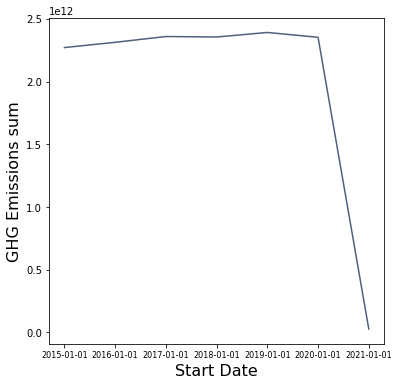

In [5]:
#create a line plot showing the total GHG emissions for each year starting from 2015 to 2020
plt.figure()
emissions_sum.plot("Start Date")
plt.tick_params(axis='x', which='major', labelsize=8)

We expect 2020 to see a huge decrease in emissions due to worldwide lockdowns. According to the graph above, it looks like 2020 had less overall emissions than 2019, but not by a huge difference. **Why do you think this is?** 

**Note:** The dataset does not have data for the entire 2021 year, only for a few months. Also, 2020 doesn't seem to be that much of a decrease. 

*Your answer here*

## Greenhouse Gas Emissions in the United States 2020-2021

In this section we will be looking specifically at GHG emissions in the United States. We hope to learn what month saw the largest decrease in GHG emissions in the US, in 2020 and what sector's emissions were most impacted by the pandemic.

Below is a dataset of monthly greenhouse gas emissions in the United States from 2015-2021.

In [6]:
#monthly GHG Emissions data

usa_monthly = requests.get("https://api.climatetrace.org/emissions_by_sector_timeseries?country=USA&interval=month&since=2000&to=2021").json()
usa_monthly = pd.json_normalize(usa_monthly, record_path = ["emissions"], meta = ["name"]).rename(columns ={"start": "Start Date", "end": "End Date", "value": "GHG Emissions", "name":"Sector"})
usa_monthly = Table.from_df(usa_monthly)
usa_monthly.show(10)

Start Date,End Date,GHG Emissions,Sector
2021-12-01,2022-01-01,2.59478e+06,agriculture
2021-11-01,2021-12-01,2.59478e+06,agriculture
2021-10-01,2021-11-01,2.68128e+06,agriculture
2021-09-01,2021-10-01,2.59478e+06,agriculture
2021-08-01,2021-09-01,2.68128e+06,agriculture
2021-07-01,2021-08-01,2.68128e+06,agriculture
2021-06-01,2021-07-01,2.59478e+06,agriculture
2021-05-01,2021-06-01,2.68128e+06,agriculture
2021-04-01,2021-05-01,2.59478e+06,agriculture
2021-03-01,2021-04-01,2.68128e+06,agriculture


Since we want to analyze emissions data in the United States during the beginning of the COVID-19 pandemic, we want to limit ourselves to data that represents emissions in the year 2020. **Filter the `usa_monthly` table to show only 2020 emissions data and assign it to `usa2020`.**

*Hint:* Use the table function `where` ([Python Reference](http://data8.org/fa21/python-reference.html)) and use the appropriate predicate.

In [7]:
#isolate rows where the year is 2020
#usa2020 = usa_monthly.where(..., ...)
#usa2020.show(5)

usa2020 = usa_monthly.where("Start Date", are.containing('2020'))
usa2020.show(5)

Start Date,End Date,GHG Emissions,Sector
2020-12-01,2021-01-01,2.88341e+09,agriculture
2020-11-01,2020-12-01,2.88341e+09,agriculture
2020-10-01,2020-11-01,2.97953e+09,agriculture
2020-09-01,2020-10-01,2.88341e+09,agriculture
2020-08-01,2020-09-01,2.97953e+09,agriculture


In the cell below, **assign `monthly_emissions2020` to a table that contains start dates and the sum of GHG emissions within each month in the United States in 2020.**

In [8]:
#drop the Sector and End Date Column
#monthly_emissions2020 = usa2020.select(..., ...)
#monthly_emissions2020 = monthly_emissions2020.group(..., ...)
#monthly_emissions2020.show(12)

monthly_emissions2020 = usa2020.select("Start Date", "GHG Emissions")
monthly_emissions2020 = monthly_emissions2020.group("Start Date", sum)
monthly_emissions2020.show(12)

Start Date,GHG Emissions sum
2020-01-01,2.26444e+10
2020-02-01,2.11835e+10
2020-03-01,2.26444e+10
2020-04-01,2.19139e+10
2020-05-01,2.26444e+10
2020-06-01,2.19139e+10
2020-07-01,2.26444e+10
2020-08-01,2.26444e+10
2020-09-01,2.19139e+10
2020-10-01,2.26444e+10


We will need to subtract emissions for each month from the prior month. To do this, we must create a list 

*Hint:* Use `np.diff`, which is a function used to find the difference between adjacent elements.

In [30]:
#agg_diff = np.diff(....)

monthly_differences = Table()

#Taking the first 11 months of GHG Emissions
feb_dec = monthly_emissions2020["Start Date"][1:]
monthly_differences = monthly_differences.with_column(label = "Start Date", values = feb_dec)

#Finding the difference in emissions between adjacent dates
agg_diff = np.diff(monthly_emissions2020["GHG Emissions sum"])

#Creating a new table
monthly_differences = monthly_differences.with_column(label = "Difference", values = agg_diff)
monthly_differences

Start Date,Difference
2020-02-01,-1.46093e+09
2020-03-01,1.46093e+09
2020-04-01,-7.30465e+08
2020-05-01,7.30465e+08
2020-06-01,-7.30465e+08
2020-07-01,7.30465e+08
2020-08-01,0
2020-09-01,-7.30465e+08
2020-10-01,7.30465e+08
2020-11-01,-7.30465e+08


What month(s) saw the largest difference in GHG emissions? Do you recognize any patterns in this data? Are you surprised by the results?

*Answer here*

Now let's look at each sector and determine which one was the most and least impacted by COVID. We'll compare data from 2019 and 2020 to see if any sectors took a hit in 2020. In the cell below, **create a table with a unique sector in each row and the corresponding total sum of GHG emissions produced in that sector.**

In [39]:
#Selecting necessary rows, then grouping to sum all the emissions within the sector 
#sector_emissions20 = usa2020.select(.....).group(...., ....)
#sector_emissions20

sector_emissions20 = usa2020.select("GHG Emissions", "Sector").group("Sector", sum)
sector_emissions20

Sector,GHG Emissions sum
agriculture,3.50815e+10
buildings,2.10489e+10
extraction,4.20978e+10
forests,2.80652e+10
manufacturing,4.20978e+10
maritime,7.01631e+09
oil and gas,2.10489e+10
power,1.40326e+10
transport,2.80652e+10
waste,2.80652e+10


In [40]:
#Let's do the same for 2019 USA
usa2019 = usa_monthly.where("Start Date", are.containing('2019'))
sector_emissions19 = usa2019.select("GHG Emissions", "Sector").group("Sector", sum)
sector_emissions19

Sector,GHG Emissions sum
agriculture,3.53622e+10
buildings,2.12173e+10
extraction,4.24346e+10
forests,2.82897e+10
manufacturing,4.24346e+10
maritime,7.07243e+09
oil and gas,2.12173e+10
power,1.41449e+10
transport,2.82897e+10
waste,2.82897e+10


Finally, let's create a table containing 2019 amnd 2020 emissions for each sector, along with the difference between those emissions.

In [41]:
#Create a table showing each sector and the corresponding total GHG emissions from 2019, 2020, 
# and the difference between the years.

#First relabel 
sector_emissions19.relabel("GHG Emissions sum", "2019 Emissions")
emissions20 = sector_emissions20.column("GHG Emissions sum")

sector_emissions = sector_emissions19.with_column("2020 Emissions", emissions20)
difference = sector_emissions.column(2) - sector_emissions.column(1)
sector_emissions = sector_emissions.with_column("Difference", difference)
sector_emissions

Sector,2019 Emissions,2020 Emissions,Difference
agriculture,3.53622e+10,3.50815e+10,-2.80627e+08
buildings,2.12173e+10,2.10489e+10,-1.68376e+08
extraction,4.24346e+10,4.20978e+10,-3.36752e+08
forests,2.82897e+10,2.80652e+10,-2.24501e+08
manufacturing,4.24346e+10,4.20978e+10,-3.36752e+08
maritime,7.07243e+09,7.01631e+09,-5.61253e+07
oil and gas,2.12173e+10,2.10489e+10,-1.68376e+08
power,1.41449e+10,1.40326e+10,-1.12251e+08
transport,2.82897e+10,2.80652e+10,-2.24501e+08
waste,2.82897e+10,2.80652e+10,-2.24501e+08


The difference column is 2020 emissions minus 2019 emissions. All the differences are negative, which means there was an overall decrease in all sectors in GHG emissions from 2019 to 2020. In the cell below, state the greatest difference between two years and state it's corresponding the sector that was impacted the most by COVID.

*Your answer here*

In [44]:
min(sector_emissions.column(3))

-336751995.7840042

This number corresponds to the manufacturing and extration sectors. Thus, the manufacturing and extraction sectors had the greatest difference in total emissions from 2019 to 2020. This means that these two sectors were impacted by covid19 the most. 